In [65]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import imageio

import radon_monitor

# Calibrator

#### Purpose: Develop a program to help calibrate the frames

### Table of Contents <a name='toc'></a>
1. [Evaluate Current Calibration](#evaluate)
2. [Calibrate](#calibrate)

### Evaluate Current Calibration <a name = 'evaluate'></a>
[Table of Contents](#toc)

In [204]:
rm = radon_monitor.Radon_Monitor()
print('Days with data = \n',rm.date_path_map['day'].unique())
print('Calibration dates = ',rm.calibrated_dates)

Days with data = 
 ['11/04/2021' '11/05/2021' '11/06/2021' '11/07/2021' '11/08/2021'
 '11/11/2021' '11/12/2021' '11/13/2021' '11/14/2021' '11/15/2021'
 '11/16/2021' '11/17/2021' '11/18/2021' '11/19/2021' '11/20/2021'
 '11/21/2021' '11/22/2021' '11/23/2021' '11/24/2021' '11/25/2021'
 '11/26/2021' '12/11/2021' '12/12/2021' '12/18/2021' '12/19/2021'
 '12/20/2021' '12/21/2021' '12/22/2021' '12/23/2021' '12/24/2021'
 '12/25/2021' '12/26/2021' '12/27/2021' '12/28/2021' '12/31/2021'
 '01/01/2022' '01/02/2022' '01/03/2022' '01/04/2022' '01/05/2022'
 '01/06/2022' '01/07/2022' '01/08/2022' '01/09/2022']
Calibration dates =  ['11/1/2021', '11/20/2021', '11/21/2021', '11/23/2021', '12/11/2021', '12/18/2021', '12/31/2021']


In [199]:
rm.date_path_map

,date,path,day
0,2021-11-04 08:01:00,/Volumes/wellington/projects/radon_monitor/dat...,11/04/2021
1,2021-11-04 09:02:00,/Volumes/wellington/projects/radon_monitor/dat...,11/04/2021
2,2021-11-04 10:03:00,/Volumes/wellington/projects/radon_monitor/dat...,11/04/2021
3,2021-11-04 11:04:00,/Volumes/wellington/projects/radon_monitor/dat...,11/04/2021
4,2021-11-04 12:05:00,/Volumes/wellington/projects/radon_monitor/dat...,11/04/2021
...,...,...,...
817,2022-01-09 12:21:00,/Volumes/wellington/projects/radon_monitor/dat...,01/09/2022
818,2022-01-09 13:21:00,/Volumes/wellington/projects/radon_monitor/dat...,01/09/2022
819,2022-01-09 14:22:00,/Volumes/wellington/projects/radon_monitor/dat...,01/09/2022
820,2022-01-09 15:23:00,/Volumes/wellington/projects/radon_monitor/dat...,01/09/2022


In [206]:
rm.date_path_map['hour'] = rm.date_path_map.date.dt.hour

In [210]:
rm.date_path_map[day_mask].path.iloc[0]

'/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_01-09-2022_0009.png'

/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_01-09-2022_2028.png
calibrated dates = ['11/1/2021', '11/20/2021', '11/21/2021', '11/23/2021', '12/11/2021', '12/18/2021', '12/31/2021']
date of photo = 01/09/2022
matched calibration date = 12/31/2021


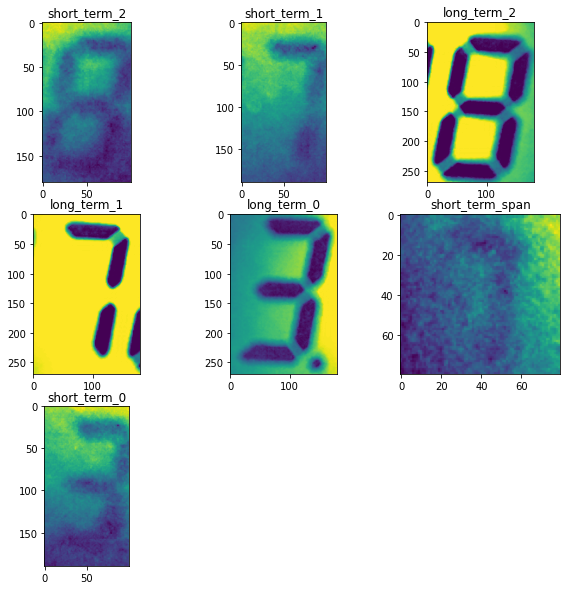

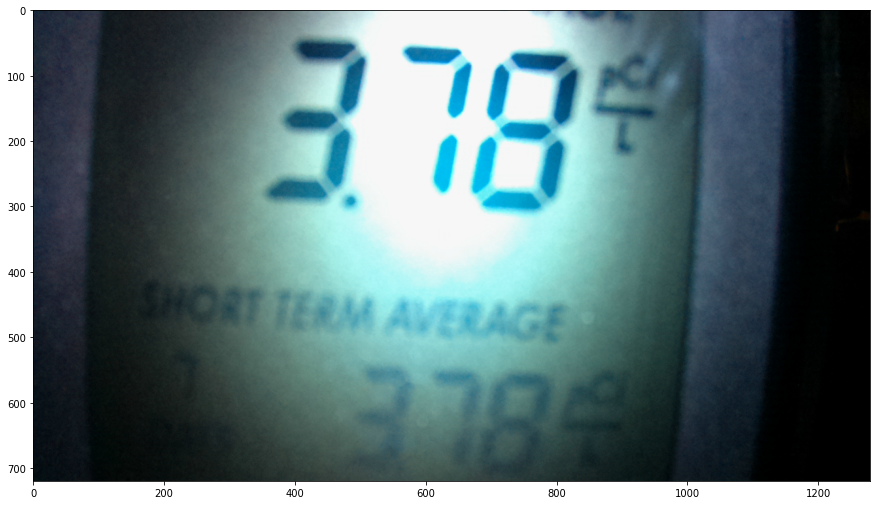

In [212]:
day = '01/09/2022'
hour = 20
hour_mask = rm.date_path_map['hour'] == hour
day_mask = rm.date_path_map['day']==day
if len(rm.date_path_map[day_mask &hour_mask])==0:
    print('No data for that day')
else:
    date_path = rm.date_path_map[day_mask&hour_mask].path.values[0]
    print(date_path)
    rm.cutout_sub(date_path)

### Calibrate <a name = 'calibrate'></a>
[Table of Contents](#toc)

In [61]:
# Prevents accidently initiating calibration
should_continue = eval(input('Ready to calibrate? True/False'))
assert should_continue == True

Ready to calibrate? True/False True


In [175]:
# intilize new calibration dataframe
date = '11/20/2021'

new_calibrated_df = pd.DataFrame({'date':7*[date],
                                  'position':['long_term_0',
                                             'long_term_1',
                                             'long_term_2',
                                             'short_term_0',
                                             'short_term_1',
                                             'short_term_2',
                                             'short_term_span'],
                                 })
new_calibrated_df.index = new_calibrated_df['position']

last calibration coordinates =  {'trow': 540, 'brow': 620, 'lcol': 240, 'rcol': 320}
adjusted calibration coordinates {'trow': 540, 'brow': 620, 'lcol': 240, 'rcol': 320}
/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_11-20-2021_1545.png


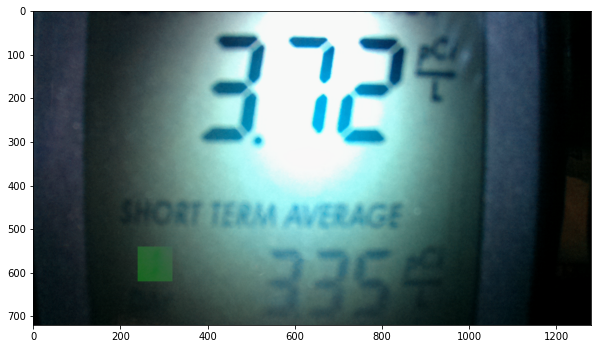

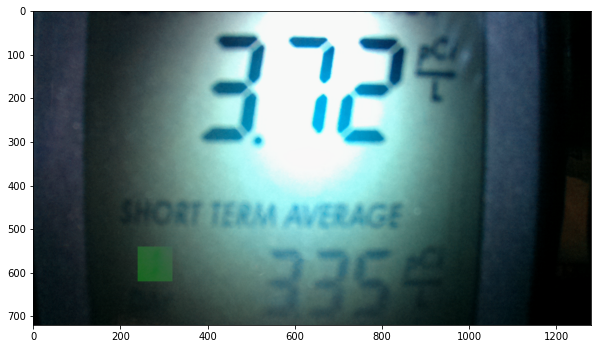

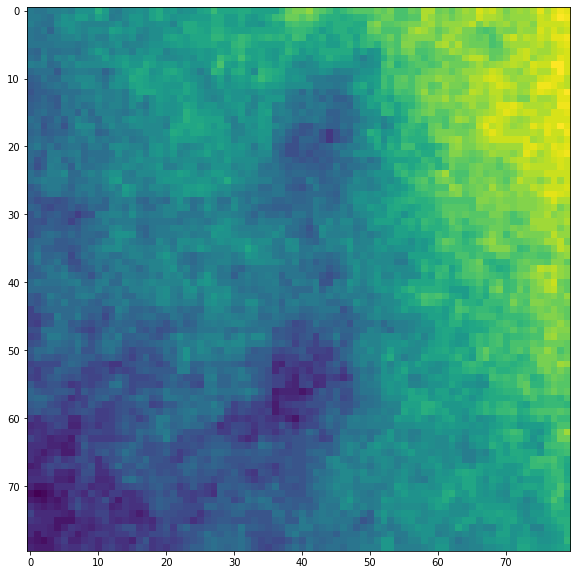

In [182]:

last_cal_day = '11/23/2021' # input (used as a starting point)
position = 'short_term_span'# input
last_cal_day_mask = rm.positions_df['date'] == last_cal_day
position_mask = rm.positions_df['position']==position
last_cal_coords = rm.positions_df[last_cal_day_mask & position_mask].coordinates.iloc[0]



# test with last_cal_coords first then adjust the coords as necessary 
test_coord = rm.coord_shifter(last_cal_coords,'vertical',0)
test_coord = rm.coord_shifter(test_coord,'horizontal',0)

print("last calibration coordinates = ",last_cal_coords)
print('adjusted calibration coordinates',test_coord)
print(date_path)


new_calibrated_df.loc[position,'coordinates'] = str(test_coord)
new_coord = eval(new_calibrated_df.loc[position,'coordinates'])
rm.scope(last_cal_coords,date_path)
rm.scope(new_coord,date_path)
rm.cutout(new_coord,date_path)

In [183]:
new_calibrated_df

,date,position,coordinates
position,,,
long_term_0,11/20/2021,long_term_0,"{'trow': 50, 'brow': 320, 'lcol': 360, 'rcol':..."
long_term_1,11/20/2021,long_term_1,"{'trow': 50, 'brow': 320, 'lcol': 530, 'rcol':..."
long_term_2,11/20/2021,long_term_2,"{'trow': 50, 'brow': 320, 'lcol': 700, 'rcol':..."
short_term_0,11/20/2021,short_term_0,"{'trow': 540, 'brow': 790, 'lcol': 530, 'rcol'..."
short_term_1,11/20/2021,short_term_1,"{'trow': 540, 'brow': 790, 'lcol': 630, 'rcol'..."
short_term_2,11/20/2021,short_term_2,"{'trow': 540, 'brow': 790, 'lcol': 730, 'rcol'..."
short_term_span,11/20/2021,short_term_span,"{'trow': 540, 'brow': 620, 'lcol': 240, 'rcol'..."


In [184]:
# save new coordinates
REFERENCE_DATA_PATH = './reference_data/'
positions_df = pd.read_csv(open(REFERENCE_DATA_PATH+'positions.csv','rb'))
new_calibrated_df = new_calibrated_df.reset_index(drop = True)
positions_df = pd.concat([positions_df,new_calibrated_df])
positions_df.loc[:,'coordinates'] = list(map(lambda x:eval(x),positions_df.coordinates))
#positions_df = positions_df.sort_values(by ='date').reset_index(drop=True)
positions_df.to_csv(REFERENCE_DATA_PATH+'positions.csv')